In [226]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [227]:
data = pd.read_csv("digit-recognizer/train.csv")

In [228]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [229]:
data.dtypes

label       int64
pixel0      int64
pixel1      int64
pixel2      int64
pixel3      int64
            ...  
pixel779    int64
pixel780    int64
pixel781    int64
pixel782    int64
pixel783    int64
Length: 785, dtype: object

In [230]:
data.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [231]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [232]:
Data = np.array(data)
print(Data.shape)
n ,m = Data.shape

(42000, 785)


In [233]:
print(Data[:6])  

[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [4 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [234]:
print(Data[:6].T)

[[1 0 1 4 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 ...
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]


In [235]:
validation_set = Data[:1000].T
Y_val = validation_set[0] # Label (number on image) for validation set
X_val = validation_set[1:]
print("highest pixel value:",  np.max(X_val))


highest pixel value: 255


In [236]:
X_val = X_val/255


In [237]:

print("highest pixel value after normalization: ", np.max(X_val))
print("average pixel value after normalization: ", np.mean(X_val))


highest pixel value after normalization:  1.0
average pixel value after normalization:  0.13395715786314524


In [238]:
training_set = Data[1000:].T # we transpose our data cause we always want the samples to be in the header/columns & the features/class to be in the rows
Y_train = training_set[0]
X_train = training_set[1:]
X_train = X_train/255
print("highest pixel value after normalisation:", np.max(X_train))
print("X_train shape:", X_train.shape)

highest pixel value after normalisation: 1.0
X_train shape: (784, 41000)


In [239]:
Y_train

array([1, 5, 1, ..., 7, 6, 9], dtype=int64)

In [240]:
## np.random.rand(); rand() here randomizes the value between 0 and 1 and the digitis in the braket is the array dimension 
example = np.random.rand(2,3)
print(example)

[[0.8957843  0.30325454 0.83243475]
 [0.03118732 0.07499894 0.35194836]]


In [241]:
def init_params():
    ## randmoize w
    W1 = np.random.rand(10, 784) - 0.5 # the - 0.5 here ensures that the random values we get are between -0.5 and 0.5   
    W2 = np.random.rand(10, 10) - 0.5 # we do this to make sure we can punish the neuron and effect it negatively 
    ## randomize b
    b1 = np.random.rand(10, 1) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    
    return W1, W2, b1, b2

In [242]:
def ReLU(Z):
    return np.maximum(Z, 0)

In [243]:
def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

In [244]:
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, Z2, A1, A2

In [245]:
def ReLU_deriv(Z):
    return Z > 0

In [246]:
ym = np.zeros((Y_train.size , Y_train.max() + 1))
yn = np.zeros((3,1))
print(yn)
Y_train.size

[[0.]
 [0.]
 [0.]]


41000

In [247]:
def one_hot(Y):
    one_hot_Y  = np.zeros((Y.size, Y.max()+1)) #1
    one_hot_Y[np.arange(Y.size), Y] = 1 #2
    one_hot_Y = one_hot_Y.T # we transpose our data cause we always want the samples to be in the header/columns & the features/class to be in the rows
    return one_hot_Y

#1 
\
here were just building an array with the size of our data filled with zeros with the headers being the classes (numbers) and the rows being the data example (samples).
so if we have: \

 Y.size = 3 → 3 (samples) \
 Y.max() + 1 = 4. so 4 possible classes, so we are only using 4 (0 ->3) numbers for this example  (numbers)
  

so this becomes our matrix: \
one_hot_Y = \
[[0. 0. 0. 0.] \
 [0. 0. 0. 0.] \
 [0. 0. 0. 0.]] 


so to visualize it better it looks something like this


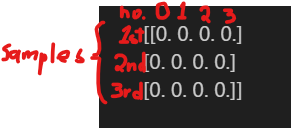

#2
\
np.arrange(Y,size) here is like some sort of loop where it itterates through samples as it iterates here through Y.size(samples) \
so here in our code \

 `one_hot_Y[arrange(Y.size), Y] = 1` \
 
 since were itterating through sample sample (row row) in each sample (row) we put 1 in the right class (column) (label/number) so if Y = np.array(3, 1, 2), in first row we'll place a 1 in the 4th column (4th columns  = class for no 3)  and the rest of the row would be 0, in the second sample (row) we would place 1 in the second class (column) an so on making it looking like this: 

Y = np.array(3, 1, 2): \
[0, Y[0]]  → [0, 3]   
[1, Y[1]]  → [1, 1]  \
[2, Y[2]]  → [2, 2] 


one_hot_Y =\
[[0. 0. 0. 1.]\
 [0. 1. 0. 0.]\
 [0. 0. 1. 0.]]
 


In [248]:
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    dZ2 = A2 - one_hot(Y)
    dA1 = W2.T.dot(dZ2)
    dZ1 = ReLU_deriv(Z1) * dA1  

    dW2 = (1/n) * dZ2.dot(A1.T)
    db2 = (1/n) * np.sum(dZ2)

    dW1 = (1/n)* dZ1.dot(X.T)
    db1 = (1/n)* np.sum(dZ1)

    return db1, dW1, db2, dW2     

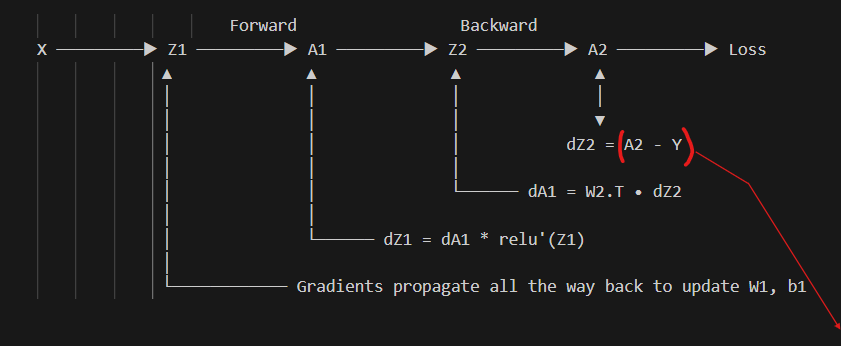    (Derivative of the cross-entropy and activation function (SoftMax))

In [249]:
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2

    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1

    return W2, b2, W1, b1

In [250]:
def get_predictions(A2):
    
        return np.argmax(A2, 0) # np.argmax() is just like np.max but instead of returning the max value it return the index of the max value
                     # the 0 in the np.argmax() is to set which axis the argmax should look in, so 0 here looks at columns by cloumns (sample) and returns the row index (class)
    
                       
def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):

    W1, W2, b1, b2 = init_params()

    for i in range(iterations):

        Z1, Z2, A1, A2 = forward_prop(W1, b1, W2, b2, X) 

        db1, dw1, db2, dw2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)

        W2, b2, W1, b1 = update_params(W1, b1, W2, b2, dw1,  db1, dw2, db2, alpha)
       
         

        if i % 10 == 0 :
            predictions = get_predictions(A2)
            print ("iteration:", i)
            print("accuracy:" , get_accuracy(predictions, Y))

        
    return W2 , b2 , W1, b1
    



In [251]:
W2, b2, W1, b1 = gradient_descent(X_train, Y_train, 0.10, 700)

iteration: 0
[5 8 5 ... 0 9 9] [1 5 1 ... 7 6 9]
accuracy: 0.11036585365853659
iteration: 10
[1 8 5 ... 9 1 9] [1 5 1 ... 7 6 9]
accuracy: 0.2206829268292683
iteration: 20
[1 1 5 ... 9 1 9] [1 5 1 ... 7 6 9]
accuracy: 0.3229268292682927
iteration: 30
[1 1 1 ... 9 0 9] [1 5 1 ... 7 6 9]
accuracy: 0.381609756097561
iteration: 40
[1 8 1 ... 9 0 9] [1 5 1 ... 7 6 9]
accuracy: 0.42978048780487804
iteration: 50
[1 8 1 ... 9 0 9] [1 5 1 ... 7 6 9]
accuracy: 0.4838780487804878
iteration: 60
[1 8 1 ... 9 6 9] [1 5 1 ... 7 6 9]
accuracy: 0.5329512195121952
iteration: 70
[1 8 1 ... 9 6 9] [1 5 1 ... 7 6 9]
accuracy: 0.5730243902439024
iteration: 80
[1 8 1 ... 9 6 9] [1 5 1 ... 7 6 9]
accuracy: 0.6049756097560975
iteration: 90
[1 6 1 ... 7 6 9] [1 5 1 ... 7 6 9]
accuracy: 0.6326341463414634
iteration: 100
[1 6 1 ... 7 6 9] [1 5 1 ... 7 6 9]
accuracy: 0.6553170731707317
iteration: 110
[1 6 1 ... 7 6 9] [1 5 1 ... 7 6 9]
accuracy: 0.6740243902439025
iteration: 120
[1 6 1 ... 7 6 9] [1 5 1 ... 7 6 9]

In [252]:
def validation_set_accuracy(X, Y, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    print("validation acuracy:", get_accuracy(predictions, Y))
    return A2

In [253]:
A2 = validation_set_accuracy(X_val, Y_val, W1, b1, W2, b2)

[1 0 1 6 0 0 7 3 5 3 8 9 1 3 3 1 8 0 7 6 8 6 2 0 8 3 6 9 9 7 8 9 4 9 2 1 3
 1 1 4 3 1 4 9 2 6 5 7 7 4 7 8 1 9 0 1 2 3 4 1 2 8 9 0 6 3 4 8 1 0 3 9 6 3
 2 4 9 1 4 1 5 4 8 9 2 8 9 5 9 6 5 6 4 4 2 7 1 2 0 5 9 2 7 7 5 8 8 5 0 6 0
 0 2 9 0 4 7 7 1 5 7 9 4 6 1 2 7 6 5 0 4 5 2 8 1 1 7 3 7 2 1 0 3 4 5 4 0 5
 4 5 3 5 1 0 5 3 7 0 9 6 6 9 5 4 2 9 3 5 9 2 4 8 7 4 5 8 8 8 2 6 9 3 1 0 4
 1 5 9 0 6 1 8 7 0 6 0 0 5 3 2 0 0 6 0 0 4 7 2 7 1 9 9 3 9 8 4 6 5 1 3 8 1
 8 7 1 3 7 6 2 6 3 6 3 2 3 6 1 7 9 2 2 2 9 5 0 2 9 2 0 1 4 8 6 3 7 1 1 1 4
 7 0 2 9 2 0 5 6 0 8 9 6 1 0 0 7 2 0 4 2 6 9 1 6 9 3 0 0 2 0 6 8 4 0 7 2 1
 9 5 2 4 8 5 2 9 7 9 2 9 7 4 9 3 2 2 3 6 3 6 8 8 3 7 0 9 2 7 9 0 5 4 5 8 4
 3 3 1 7 8 9 7 6 2 1 7 0 5 6 0 3 9 0 4 6 6 2 2 9 0 7 7 2 2 6 3 4 3 0 1 9 6
 2 1 9 0 6 0 4 5 4 3 1 5 4 2 9 5 7 3 1 5 4 5 3 7 3 8 6 4 4 6 1 1 4 0 0 5 8
 6 7 4 2 8 0 2 5 9 8 3 0 4 4 5 6 4 1 8 1 5 4 7 4 3 2 0 6 0 7 9 2 9 8 9 6 3
 2 4 4 6 4 8 4 1 7 3 8 9 3 9 9 7 3 8 2 2 9 2 8 9 1 9 3 6 0 2 2 4 1 2 7 2 1
 3 4 9 1 2 0 2 2 3 4 1 3 